<a href="https://colab.research.google.com/github/deepzlabs/RAG_playground/blob/main/Lab3_Fine_Tuning_using_PEFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Lab-3
## Here you will learn how Fine tuning a model is done using Peft(QloRA) technique.

### Requirements

- Resource constraints (NO GPU available)
- Lot of experiments needed
   -  Faster iterations with low cost per iterations
- Reduce memory footprint to have simple Infrastructure
- Train same model longer rather then trying too many things

### What is PEFT Finetuning?
Tarining large model can be hard due to sheer size of models and have risk of creating issues like model accuracy degradation. PEFT (Parameter Efficient Fine Tuning), is a set of fine-tuning techniques that allows you to fine-tune and train models much more efficiently than normal training. PEFT techniques usually work by reducing the number of trainable parameters in a neural network. The most famous and in-use PEFT techniques are Prefix Tuning, P-tuning, LoRA, etc. LoRA is perhaps the most used one. LoRA also has many variants like QLoRA and LongLoRA, which have their own applications.

### So what is LoRA when fine tuning using PEFT?

Imagine you're training a giant word master, a super powerful language model, but it takes forever and costs a ton of money to teach it new things. Fine-tuning with LORA is like giving it a mini-lesson instead of a whole new course.

Here's the deal:

Normally, fine-tuning is like teaching the word master everything from scratch again for a new task. This takes a lot of time and effort.
LORA is a shortcut. It adds a small, special toolbox to the word master. This toolbox helps it learn the new task without changing everything it already knows.

Here's what makes LORA cool:

Faster learning: The word master picks things up quicker with the cheat sheet.
Saves money: Training is cheaper because less needs to be taught.
Smaller model: The toolbox is tiny, so the whole thing stays compact.
Here's a catch:

Not as strong sometimes: The cheat sheet might not be perfect for every task. Regular fine-tuning can be more powerful, but it takes more effort.

### QloRA

It follows the LoRA techniques but with a quantized model of the base model. Upon doing this the model size is lowered. The fine tuning process is much faster and much more effective, without losing any existing information.

## What is going on in the diagram below?

Fine-tuning is a technique for adapting a pre-trained model to a specific task. In the context of LLMs, the pre-trained model is a giant neural network that has been trained on a massive amount of text data. This pre-trained model can then be fine-tuned for a specific task, such as machine translation or question answering, by training it on a smaller dataset of text that is relevant to the task.

The diagram compares three different fine-tuning methods: full finetuning, LORA (Low-Rank Optimization), and QLORA (Quantized Low-Rank Optimization).

Full finetuning is the most accurate method, but it also requires the most memory. This is because all of the parameters of the pre-trained model are updated during fine-tuning.

LORA is a more memory-efficient method that only updates a small subset of the parameters of the pre-trained model. This is done by using a technique called low-rank optimization. However, LORA can sometimes be less accurate than full finetuning.

QLORA is a new method that is both memory-efficient and accurate. It works by quantizing the weights of the pre-trained model to a lower precision (such as 4 bits), and then using LORA to update a small subset of the quantized weights. This quantization process can significantly reduce the memory footprint of the model.

The diagram shows that QLORA can be used to fine-tune a large language model with 65 billion parameters on a single GPU with only 48GB of memory. This would not be possible using full finetuning or LORA.

Here are some of the benefits of using QLORA for fine-tuning LLMs:

It can significantly reduce the memory footprint of the model, which can make it possible to fine-tune LLMs on devices with limited memory.

It can be just as accurate as full finetuning.

It can be faster than full finetuning or LORA.

Image referenced from (https://www.mercity.ai/blog-post/guide-to-fine-tuning-llms-with-lora-and-qlora#qlora-finetuning)

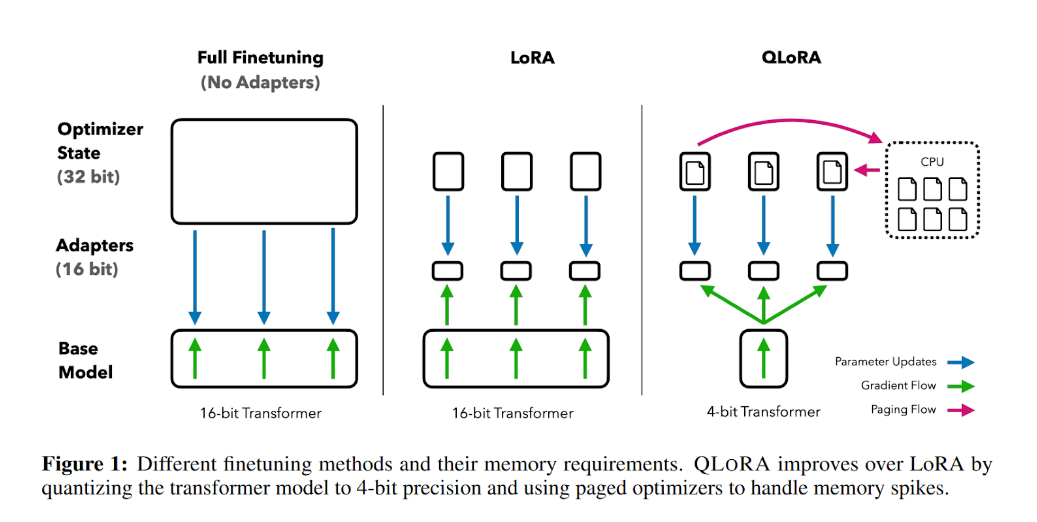

### Installing all the packages needed for Fine tuning and inference from the model

#### What each package does
*   accelerate: This library helps with distributed training across multiple GPUs or machines. It simplifies launching training scripts on these setups and manages communication between devices. During fine-tuning, you might have a large dataset that benefits from processing on multiple GPUs for faster training.(In our case we offload some of the weight on the CPU for faster retrieval)
*   transformer: This package is provided by huggingface and contains all the necessary imports needed for training and inference. Eg: Trainer.trainer, BitsAndBytesConfig, pipeline etc.
*  datasets : This library simplifies loading and preparing various NLP datasets. It provides functionalities for downloading pre-processed datasets, splitting them into training, validation, and test sets, and applying transformations on the data for model training.
* bitsandbytes : This library is specifically designed for quantization of transformer models. Quantization reduces the model size and memory footprint by representing weights and activations using lower precision formats (e.g., 8-bit integers) compared to standard 32-bit floats. This can be crucial for deployment on resource-constrained devices during inference.
* peft : This package is used for generating LoraConfig of the model, which is crucial for combining with the base model, in order to generate the Lora Adapters. <Action item> explain why is this crucial , what is in LoRa config file.





In [ ]:
 !pip install -q accelerate bitsandbytes transformers==4.39.3 datasets==2.17.0 peft==0.4.0 #trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 72.7 MB/s eta 0:00:00


### Importing all the necessary packages

In [ ]:
import os
import torch
import transformers
from datetime import datetime
from datasets import load_dataset
import warnings
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import prepare_model_for_kbit_training, PeftModel

warnings.filterwarnings('ignore') # This line stops different warnings that are not necessary to be shown in the output field

Here in the code below we load the content of a JSONl file, which contains questions and answers, but we pass only the question and generate the answers to the question and match them to the recorded answers in the JSONL file.

### Upload the datasets to the runtime:

## How the dataset was collected and what it consists of.

The dataset mainly consists of:
* The system message, that consists of message to the system and the RAG chunks that will provide context to the model.
* The user message, that consists of the user question that the is being asked to the model.
* The assistant message consists of the answer that the model generated for that question.

The dataset was collected in the following way:
* First we used different PDFs to create the chunks of the document and store them as vector DB
* These chunks were then retrieved according to the question asked, using RAG
* These chunks were then included in a proper format before passing on to the model.
* Now the Question and the prompt(chunks included) were passed to the GPT 3.5 for generating answers.
* Then manually checking the answer to mark it as correct.
* These three things were then included in the JSONL file, which will be later used for fine tuning.

[Train dataset](https://github.com/initmahesh/MLAI-community-labs/blob/main/Class-Labs/Lab-3(Fine-tuning-PEFT-LoRA)/formatted_train_set.jsonl),
[Test dataset](https://github.com/initmahesh/MLAI-community-labs/blob/main/Class-Labs/Lab-3(Fine-tuning-PEFT-LoRA)/formatted_test_set.jsonl)


Follow the instructions to upload the files given under the Pre-requisites section


In [ ]:
import json
question = []
with open("formatted_test_set.jsonl","r") as f:
    question = [json.loads(line) for line in f]

messages = [
      {"role": "user", "content": question[6]["content"]+'\n'+question[7]["content"]}
]
print(question[6]["content"]+"\n"+question[7]["content"],"\n\n\nCorrect Answer: ",question[8]["content"])

You are a seasoned lawyer with a strong background in Master Service Agreement agreement.\ 
    Your expertise is required to analyze a Master Service Agreement agreement and answer a question based on that Master Service Agreement agreement.    
    The Master Service Agreement agreementagreement is provided in JSON format where each object two keys 'page_number' and 'content', 'page_number' key contains the page number of the page of the Master Service Agreement agreementagreement and 'content' key contains the content on that page.
    
        
    The Master Service Agreement agreement is mentioned below in triple quotes.    Master Service Agreement agreement: '''{'page_number': 25, 'content': '(d)The P arties agr ee to submit themselv es to the jurisdiction of such c ourts.'}{'page_number': 24, 'content': 'Clauses apply; or(ii)Regula tion (EU) 2016/679 becomes part ofthelegalframe workofthecountrytowhich thepersonal dataistransferred.This iswithout prejudice toother oblig ations 

### Creating the accelerator object that is used to prepare the model for training (Offload some of the weight to the CPU)
Since we the Model we will be using is Phi-3 which has 3 billion parameters
, storing all of them in the GPU is not recommended as it will fill up the GPU instantly, so we offload some of these nodes/weights to the CPU, and the accelerator helps us in doing so.

In [ ]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

### Choosing the Model (This model can be hosted in Hugging Face or should be a path to a local folder).
#### This local folder should contain the config.json file and the safe tensors of the models, if these are not present the **AutoModelForCausalLM** that is used below to load the model will throw error.

In [ ]:
model_name = "microsoft/Phi-3-mini-128k-instruct"

### BitsAndBytesConfig
#### Used for quantizations, to significantly reduce the size of the model to fit in GPU for training.
#### The quantization used is 4 bit quantization with double quantization where 0.4 bit quantization is used in the second run. "nf4" refers to a specific quantization scheme supported by bitsandbytes.

This is useful because with less memory, the computer can work faster and use less power. It's like being able to carry your Legos in a smaller, lighter box - easier to use and play with!

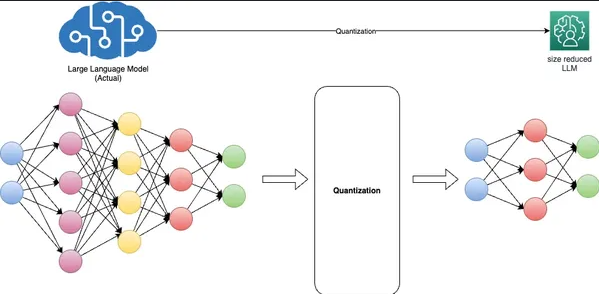

### Here are some key things about BitsAndBytesConfig:

Less Space: It shrinks the size of the computer model, making it use less memory.
Faster Speed: With a smaller model, the computer can work on things quicker.
Trade-off: Sometimes, making things smaller might make them a little less perfect. But BitsAndBytesConfig tries to keep things working well while shrinking the size.

### AutoModelForCausalLM
#### model_name is used to look for the model. If the model_name is a path to a local folder containing a config.json file and model safe tensors. Else it will look for the model in Huggingface, if it does not exist as a local folder.


*   quantization_config : This parameter takes the BNB config that we created.
*   low_cpu_mem_usage : Setting this argument to True (which it is here) instructs the library to use optimizations that might reduce memory usage on the CPU during model loading. This can be helpful for systems with limited memory.
* trust_remote_code : Setting this argument to True (which it is here) signifies that you trust the code hosted by the Hugging Face model repository.



In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    # attn_implementation='eager',
    torch_dtype=torch.float16,
    use_safetensors = True,
    low_cpu_mem_usage=True,
    trust_remote_code=True
)

config.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

### Tokenizer
A tokenizer plays a crucial role in working with pre-trained transformer models for Natural Language Processing (NLP) tasks. It performs several key functions:

* Vocabulary Building: The tokenizer builds a vocabulary of all the words or sub-word units (like characters) the pre-trained model was trained on.

* Text Preprocessing: It preprocesses the text input you provide for the model. This often involves steps like:

* Normalization: Converting text to lowercase or uppercase as needed.
Tokenization: Splitting the text into individual words or sub-words based on the vocabulary.
Special Token Addition: Adding special tokens (like padding markers or start/end of sentence markers) required by the model architecture.
Numerical Representation: The tokenizer converts the preprocessed text (words or sub-words) into numerical representations that the model can understand. This might involve converting each word to its corresponding index in the vocabulary or applying more complex techniques like Byte Pair Encoding (BPE).

By using the same tokenizer that the pre-trained model was trained with, you ensure that the input text is represented in the same way the model expects it. This is essential for the model to make accurate predictions on new data.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### General Inferencing

This function will be used to inference from the model. It takes in list of messages.
These messages are combined with some generation arguments that help in controlling the precision, uniqueness and randomness of the output.

**Pipeline** is used for inference from the model, it takes in the quantized model that we generate using BNB, along with the tokenizer.

In [ ]:
def generate(messages):
  pipe = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
      trust_remote_code = True
  )

  generation_args = {
      "max_new_tokens": 500,
      "return_full_text": False,
      "temperature": 0.0,
      "do_sample": False,
  }

  output = pipe(messages, **generation_args)
  print(output[0]['generated_text'])

In [ ]:
generate(messages)

 Answer: European Union Law

Thought Process:
1. Identified the key term in the question: "Governing Law."
2. Recognized that the question is asking for the name of the governing law as it is applied within the context of the Master Service Agreement.
3. Reviewed the provided Master Service Agreement and identified relevant clauses that discuss legal frameworks.
4. Noticed that the agreement mentions "Regulation (EU) 2016/679" in relation to data protection and privacy, which is a specific legal framework.
5. Understood that the agreement also references "the law of England and Wales" and "the law of Switzerland" in relation to jurisdiction and applicable law.
6. Determined that the core meaning of the question is to find the specific legal framework or jurisdiction that governs the agreement.
7. Concluded that the most directly mentioned governing law in the context of the agreement is "European Union Law," as it is the legal framework that includes Regulation (EU) 2016/679.


### Cleanup Method
Here we are cleaning the GPU, sometimes, due to the size of the model, the GPU gets clogged and does not free up the space.
We run the cell below to free this.

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()

### Fine tuning the model

#### Loading the datasets to fine tune our model.
load_dataset from the dataset package will take care of generating splits and creating a list of the data present in the dataset.

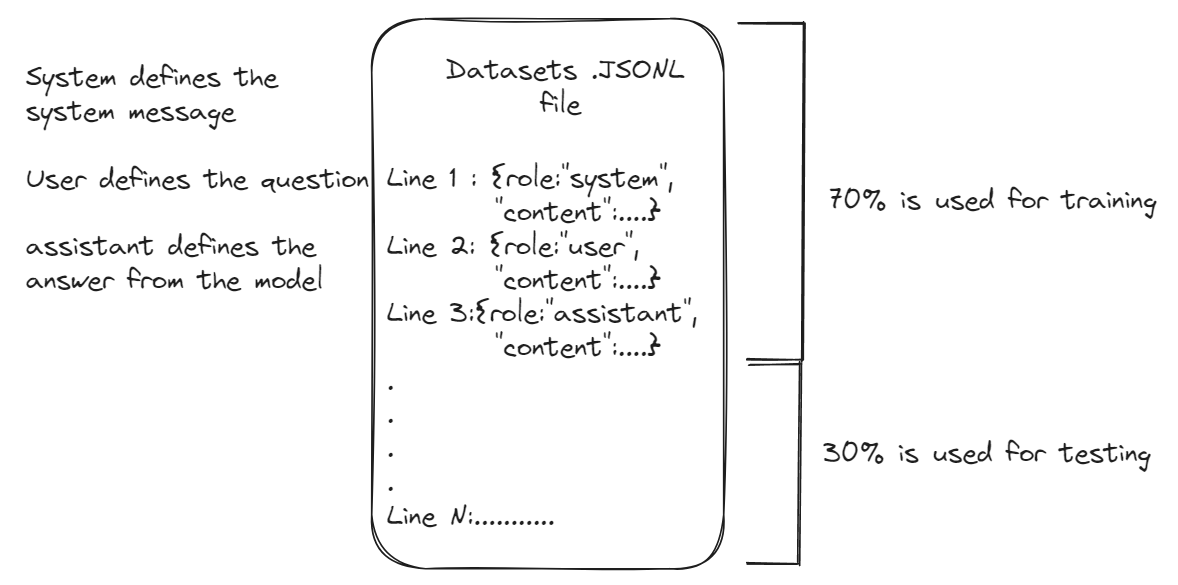

In [ ]:
from datasets import load_dataset
train_dataset = load_dataset('json', data_files='/content/formatted_train_set.jsonl', split='train')
validation_dataset = load_dataset('json', data_files='/content/formatted_test_set.jsonl', split='train')

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

#### In order to tokenize the datasets, the list needs to be converted and passed to the tokenizer. This function gets called iteratively when mapping each dataset value to the tokenizer.
Tokenizers will throw error if anything else other than string is passed to the model. And the content from datasets file is in the form of an array thus, it is converted to string.

In [ ]:
def format_prompt(mess):
  text = str(mess)
  return text

### Breaking down each parameter for the AutoTokenizer.from_pretrained()


*   model_name (str): This argument should be the same name you used to load the model earlier.
*   This argument sets the side for padding sequences during tokenization. Here, it's set to "left". Padding is used when working with batches of sequences that have different lengths. The model expects all sequences in a batch to be the same size. Padding adds special tokens (usually the pad token) to shorter sequences to make them all the same length.
* add_eos_token (Optional[bool]): Setting this argument to True (which it is here) ensures the tokenizer adds a special "end-of-sentence" token (often denoted by `</s>`) to the end of each processed sequence. This token can be crucial for the model to understand where a sentence ends, especially for tasks like text generation.
* add_bos_token (Optional[bool]): Setting this argument to True (which it is here) ensures the tokenizer adds a special "beginning-of-sentence" token (often denoted by `<s>`)

##### tokenizer.pad_token = tokenizer.eos_token: This line assigns the value of the "end-of-sentence" token (eos_token) to the tokenizer's pad_token attribute. This is a common practice, especially for causal language models, where the end of a sentence often signifies a stopping point for generation. By setting them to the same value, you ensure that the model treats both the end of a sentence and padding tokens similarly during processing.

### generate_and_tokenize_prompt(prompt)
This function will take the prompt/input and tokenize it for training or inference of the model.<br>
**tokenizer()** takes:


*   truncation=True: This argument specifies that the tokenizer should truncate the prompt if its length exceeds a certain limit.
* max_length=512: This argument sets the maximum length for the tokenized prompt. Any tokens exceeding this limit will be removed during truncation.
* padding="max_length": This argument instructs the tokenizer to pad the prompt with the padding token (set earlier) up to the max_length if the prompt is shorter.

tokenized_train_dataset,tokenized_validation_dataset stores the dataset loaded earlier and converts them to tokenized format.



In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    result = tokenizer(
        format_prompt(prompt),
        truncation=True,
        max_length=512,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_validation_dataset = validation_dataset.map(generate_and_tokenize_prompt)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/51 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]

* Gradient checkpointing discards these unnecessary activations after they've been used to compute the gradients for the subsequent layer. This can significantly reduce memory usage during training, especially for large models.
* k-bit quantization, where "k" is a specific number of bits used to represent the weights in the model.

In [ ]:
model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)



1.   Trainable parameters: These are the parameters that have requires_grad set to True and are updated during the training process to optimize the model's performance.
2. Non-trainable parameters: These are parameters that have requires_grad set to False and are not updated during training. They might be fixed values or pre-trained parameters not intended for further adaptation.



In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

### Cleanup Method

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()

#### LoraConfig
This is an important step before fine tunings, since the Lora Configuration is prepared here that tells that is used for PEFT.


*   r=16: This sets the rank of the update matrices used in LoRA. The rank determines the size and complexity of these matrices, which in turn affect the trade-off between parameter reduction and accuracy.
*   lora_alpha=32: This sets the LoRA scaling factor. This factor is used to scale the update matrices during the training process. It can influence the convergence behavior and final performance of the fine-tuned model.
* target_modules: This list specifies the target modules where LoRA will be applied. Here, it targets several key modules in a typical Transformer architecture:

* * "o_proj": Refers to the output projection layer.
* * "qkv_proj": Refers to the projection layer for queries, keys, and values in the multi-head attention mechanism.
* * "gate_up_proj": The projection layer for the update gate in a gated recurrent unit (GRU) or similar architecture.
* * "up_proj": Projection layer used for dimensionality increase in the transformer encoder or decoder.
* * "down_proj": Projection layer used for dimensionality reduction in the transformer encoder or decoder.
* * "lm_head": Refers to the language modeling head that predicts the next token in a sequence.

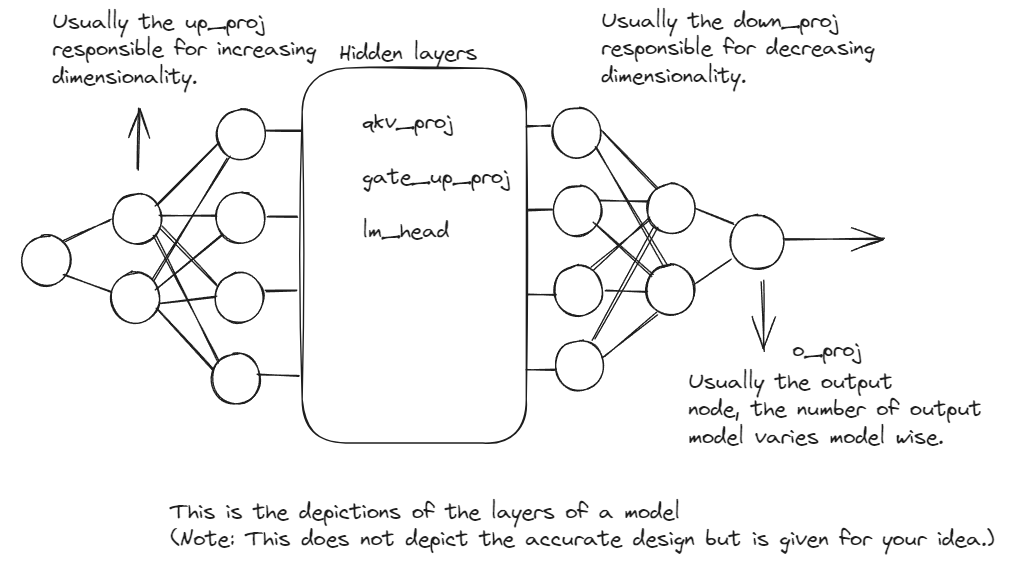

The model is then combined with the config to get a PEFT model that will be used for training.



In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=[
        "o_proj",
        "qkv_proj",
        "gate_up_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

# Apply the accelerator. You can comment this out to remove the accelerator.
model = accelerator.prepare_model(model)

trainable params: 25728000 || all params: 2034868224 || trainable%: 1.2643570574523846


### Cleanup Method
Here we are cleaning the GPU, sometimes, due to the Fine tuning process, the GPU gets clogged and does not free up the space.
We run the cell below to free this.

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()

## Trainer
* trainer = transformers.Trainer(...): This line creates a Trainer object from the Transformers library to handle the fine-tuning process. The trainer takes several arguments:

* * model: The pre-trained causal language model (model) you want to fine-tune.
* * train_dataset: The training dataset (tokenized_train_dataset) prepared earlier.
* * eval_dataset: The validation dataset (tokenized_validation_dataset) prepared earlier.
* * args: This argument is a TrainingArguments object that defines various hyperparameters for the training process. Here's a breakdown of the important arguments used:
* * * output_dir: This specifies the directory (./ + run_name) where the training outputs (model checkpoints, logs) will be saved.
* * * warmup_steps: This sets the number of warmup steps for the learning rate scheduler (usually a small value like 1).
* * * per_device_train_batch_size: This sets the batch size per device (GPU) for training. Here, it's set to 2.
* * * gradient_accumulation_steps: This accumulates gradients over multiple batches before updating the model weights. Here, it's set to 1 (no accumulation).
* * * gradient_checkpointing: This enables gradient checkpointing (already explained earlier) to reduce memory usage during backpropagation (set to True).
* * * fp16: This enables mixed precision training using 16-bit floating-point precision (might require additional configuration, set to True here).
* * * max_steps: This sets the maximum number of training steps (51). This defines the total duration of the fine-tuning process.
* * * learning_rate: This sets the learning rate (2e-4) for the optimizer. A smaller learning rate is often used for fine-tuning compared to pre-training from scratch.
* * * bf16: This enables training with bfloat16 precision if the GPU supports it (set to False here).
* * * optim: This specifies the optimizer used for training. Here, "paged_adamw_32bit" is likely a custom optimizer variant.
* * * logging_dir: This specifies the directory (./logs) for storing training logs.
* * * save_strategy: This sets the strategy for saving model checkpoints. Here, "steps" indicates saving checkpoints every logging step.
* * * save_steps: This refines the save_strategy by specifying the exact number of steps (50) between checkpoints.
* * * evaluation_strategy: This sets the strategy for model evaluation. Here, "epoch" indicates evaluating the model every logging step.
* * * eval_steps: This refines the evaluation_strategy by specifying the exact number of steps (51) between evaluations.
* * * do_eval: This ensures evaluation is performed at the end of training (set to True).
* * * logging_steps: This sets the frequency (5) for logging training information (step and loss).
* * * run_name: This assigns a unique name to the training run using the base model name, a timestamp, and potentially other information.

**data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False)**: This line defines a data collator object (data_collator) specifically designed for language modeling tasks (not masked language modeling, hence mlm=False). The data collator handles tasks like batching and padding the training data for efficient processing by the model.

In [ ]:
# Defining the output directory name
base_model_name = "phi3-128k"
run_name = base_model_name + "-" + "-mini-custom-finetune"
output_dir = "./" + run_name

tokenizer.pad_token = tokenizer.eos_token

trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validation_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        fp16=True,
        max_steps=51,       # Training steps
        learning_rate=2e-4, # Want a smaller for finetuning
        bf16=False,         # Enable if GPU supports bfloat16
        optim="paged_adamw_32bit",
        logging_dir="./logs",         # Directory for storing logs
        save_strategy="steps",        # Save the model checkpoint every logging step
        save_steps=50,                # Save checkpoints every step
        evaluation_strategy="epoch", # Evaluate the model every logging step
        eval_steps=51,               # Evaluate and save checkpoints every 50 steps
        # do_eval=True,                # Perform evaluation at the end of training
        logging_steps = 5,            # Log step and training loss info
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

## Start the training process

The loss function/values that you will see defines the difference between the targeted values and the predicted values. So, the difference between the answers in the test set and the values spitted by the model itself. The lower the loss value the better the model will perform.

But always watch out for overfitting when the model start to predict values too good to be true.

### This is how the loss function can be potrayed.

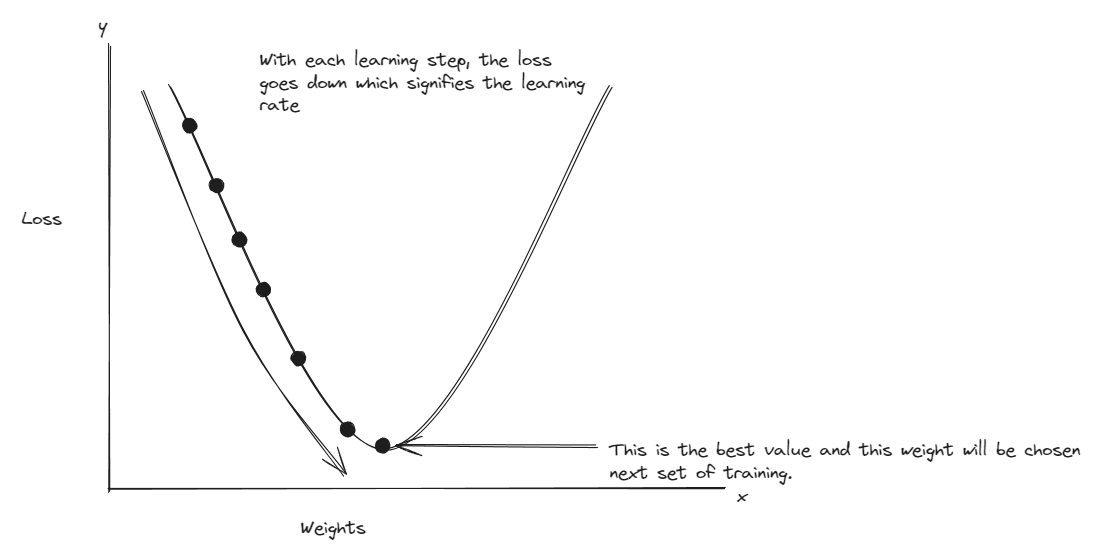

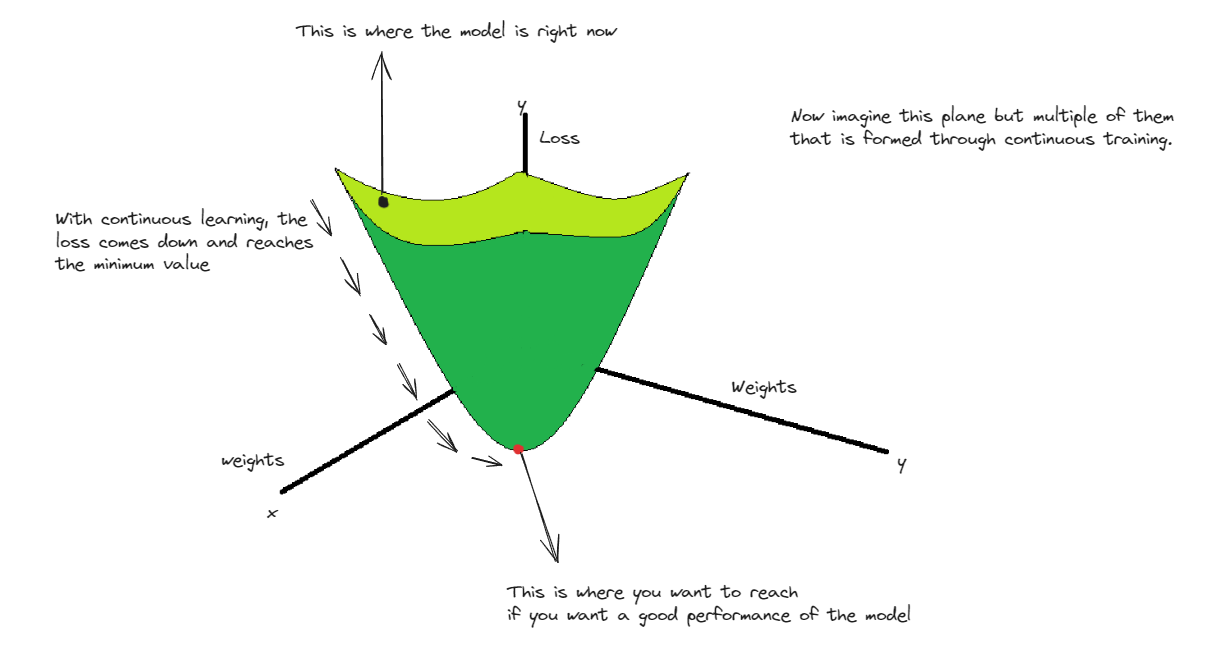

Multiple such plains formed after multiples iteration of training creates something that looks like this

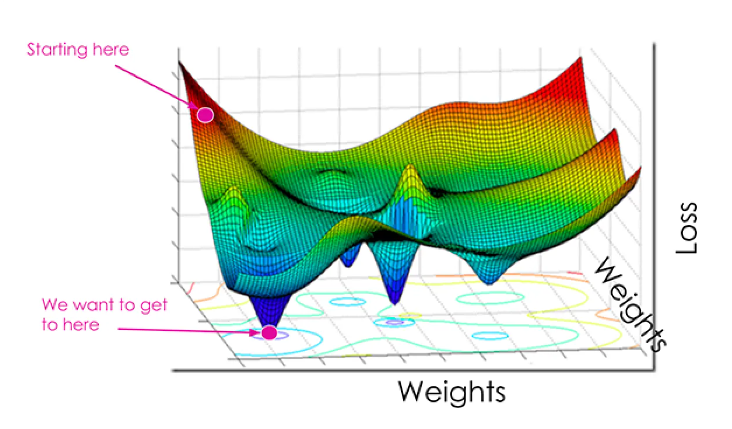

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.917700,1.331959


TrainOutput(global_step=51, training_loss=1.333614933724497, metrics={'train_runtime': 188.0758, 'train_samples_per_second': 0.542, 'train_steps_per_second': 0.271, 'total_flos': 1162994692128768.0, 'train_loss': 1.333614933724497, 'epoch': 1.96})

### Here we will also move the model that was used to create the PEFT adapters to CPU and free up the GPU as we do not require it anymore

In [ ]:
%%capture
model.cpu()

### Cleanup Method
Here we are cleaning the GPU, sometimes, due to the Fine tuning process, the GPU gets clogged and does not free up the space.
We run the cell below to free this.

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()

### Here we will load a Fresh copy of the Phi-3 model that has not been modified to tailor to the needs of Peft fine tuning.

This model will then be combined with the PEFT adapters that are generated for inferencing

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    # attn_implementation='eager',
    torch_dtype=torch.float16,
    use_safetensors = True,
    low_cpu_mem_usage=True,
    trust_remote_code=True
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

### Combining the Lora Adapter with the base model

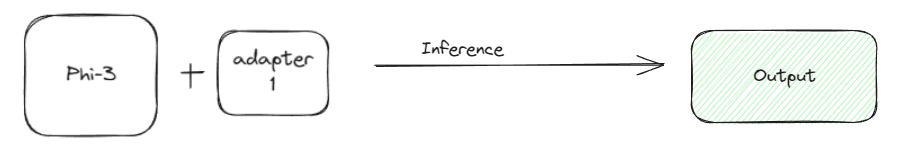

In [ ]:
ft_model = PeftModel.from_pretrained(model, "/content/phi3-128k--mini-custom-finetune/checkpoint-50")

### The code cell below is done so that the next time the Training is done the model+adapters are trained together and the newer adapters will also retain previous information.

In order to train and retrain, we use the same model combined with the previously trained adapters and gain throw them under training for generating adapter, which again is combined with the base model for training and inferencing.

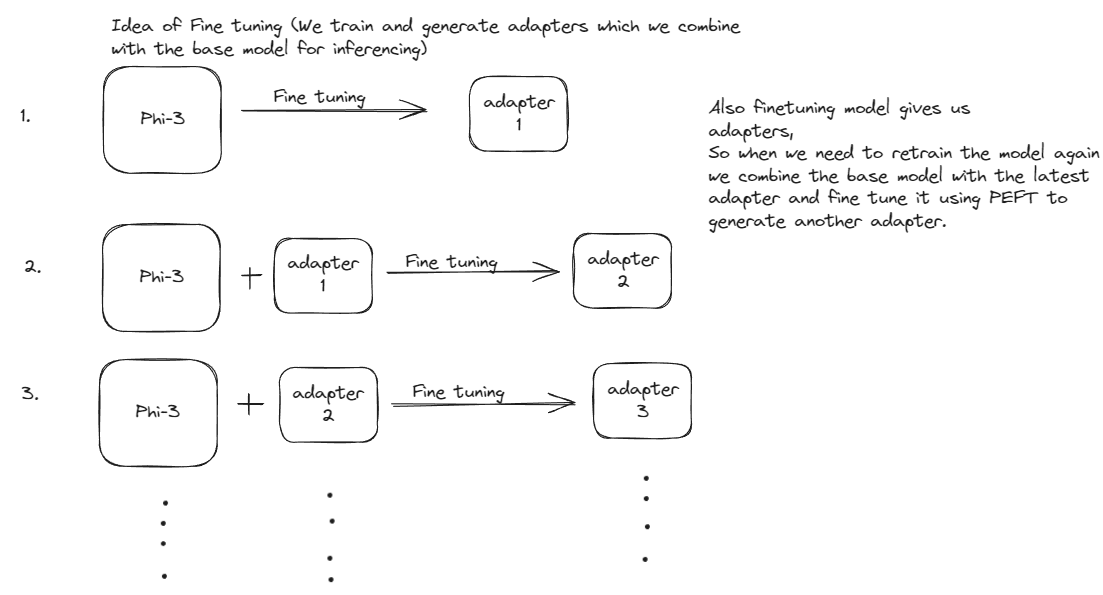

In [ ]:
model = ft_model

### The formatted_test_set.jsonl stores the questions and answers required for testing the inference of the model

In [ ]:
import json
question = []
with open("/content/formatted_test_set.jsonl","r") as f:
    question = [json.loads(line) for line in f]

### Creating the eval_prompt that will be passed in the fine_tuned_pi() function that we be used for generating answers.

`model.eval()` sets the PyTorch model to evaluation mode, disabling operations like dropout, useful for inference and testing.
This method plays a pivotal role in ensuring consistent and reliable model behavior during inference and testing. Let’s delve into the details of what model.eval() does and why it is crucial in the deep learning pipeline.

Key Aspects of model.eval():

Deactivation of Dropout:
During training, dropout layers are utilized to randomly deactivate a portion of neurons, preventing overfitting.
In evaluation mode (model.eval()), dropout layers are turned off, ensuring that all neurons contribute to the predictions. This is essential for maintaining consistency during inference.

Consistent Inference:
The primary purpose of model.eval() is to create a consistent environment for model inference.
By deactivating dropout and adjusting batch normalization, the model’s behavior during evaluation aligns with its behavior during training, eliminating potential sources of variability.

In [ ]:
# eval_prompt =f"### Question:{question[1]['input_text']}."
eval_prompt = [
    {"role": "user", "content":question[6]["content"]+'\n'+question[7]["content"] }
]
# eval_prompt =f"Write a poem about a horse?"
model_input = tokenizer(str(eval_prompt), return_tensors="pt").to("cuda")

ft_model.eval()
# model.eval()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Phi3ForCausalLM(
      (model): Phi3Model(
        (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
        (embed_dropout): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0-31): 32 x Phi3DecoderLayer(
            (self_attn): Phi3Attention(
              (o_proj): Linear4bit(
                in_features=3072, out_features=3072, bias=False
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=3072, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=3072, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (qkv_proj): Linear4bit(
     

#### This function will use the pipeline from the transformers package combined with the generation arguments and prints the output(answer) from the model.

In [ ]:
def fine_tuned_pi(eval):
  pipe = pipeline(
        "text-generation",
        model=ft_model,
        tokenizer=tokenizer,
        trust_remote_code = True
    )

  generation_args = {
      "max_new_tokens": 500,
      "return_full_text": False,
      "temperature": 0.0,
      "do_sample": False,
  }

  output = pipe(eval, **generation_args)
  print("\n\nAnswer from Phi-3:\n",output[0]['generated_text'])

### Cleanup Method
Here we are cleaning the GPU, sometimes, due to the Fine tuning process, the GPU gets clogged and does not free up the space.
We run the cell below to free this.

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()

### Inferencing from the Model that is combined with the adapters

In [ ]:
print(eval_prompt)
print("\nSystem Message: ",question[6]["content"])
print("\nQuestion: ",question[7]["content"])

fine_tuned_pi(eval_prompt)

The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MambaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MixtralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MusicgenMelodyForCausalLM', 'MvpForCausalLM', 'OpenLlam

[{'role': 'user', 'content': 'You are a seasoned lawyer with a strong background in Master Service Agreement agreement.\\ \n    Your expertise is required to analyze a Master Service Agreement agreement and answer a question based on that Master Service Agreement agreement.    \n    The Master Service Agreement agreementagreement is provided in JSON format where each object two keys \'page_number\' and \'content\', \'page_number\' key contains the page number of the page of the Master Service Agreement agreementagreement and \'content\' key contains the content on that page.\n    \n        \n    The Master Service Agreement agreement is mentioned below in triple quotes.    Master Service Agreement agreement: \'\'\'{\'page_number\': 25, \'content\': \'(d)The P arties agr ee to submit themselv es to the jurisdiction of such c ourts.\'}{\'page_number\': 24, \'content\': \'Clauses apply; or(ii)Regula tion (EU) 2016/679 becomes part ofthelegalframe workofthecountrytowhich thepersonal datais

### Don't forget to clean up now 🙂
Here we are cleaning the GPU, sometimes, due to the Fine tuning process, the GPU gets clogged and does not free up the space.
We run the cell below to free this.

In [ ]:
import gc
for obj in gc.get_objects():
        try:
            if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
                obj.cpu()
        except Exception:
            pass

# Clearing garbage values
gc.collect()

# Clearing CUDA cache
torch.cuda.empty_cache()